In [784]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import shap

In [785]:
path_2020 = "../data/raw/2020_season/nba2021_per_game.csv"
path_2021 = "../data/raw/2021_season/2021-2022 NBA Player Stats - Regular.csv"
path_2022 = "../data/raw/2022_season/2022-2023 NBA Player Stats - Regular.csv"

In [786]:
df_2022 = pd.read_csv(path_2022, encoding="latin-1", sep=";")
df_2021 = pd.read_csv(path_2021, sep=";", encoding="latin-1")
df_2020 = pd.read_csv(path_2020)

# Visualización de los Dataframes


## Temporada 2020-2021

In [787]:
df_2020.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1


## Temporada 2021 - 2022


In [788]:
df_2021.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


## Temporada 2022 - 2023

In [789]:
df_2022.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


# Limpieza de datos

## Equipos clasificados a playoffs

In [790]:
equipos_este_2020 = ["PHI", "BKN", "MIL", "NYK", "ATL", "MIA", "BOS", "WAS"]
equipos_este_2021 = ["MIA", "BOS", "MIL", "PHI", "TOR", "CHI", "BKN", "CLE"]
equipos_este_2022 = ["MIL", "BOS", "PHI", "CLE", "NYK", "BKN", "MIA", "ATL"]
equipos_oeste_2020 = ["UTA", "PHX", "DEN", "LAC", "DAL", "POR", "LAL", "MEM"]
equipos_oeste_2021 = ["PHX", "MEM", "GSW", "DAL", "UTA", "DEN", "MIN", "LAC"]
equipos_oeste_2022 = ["DEN", "MEM", "SAC", "PHX", "LAC", "GSW", "LAL", "MIN"]
playoffs_2020 = equipos_este_2020 + equipos_oeste_2020
playoffs_2021 = equipos_este_2021 + equipos_oeste_2021
playoffs_2022 = equipos_oeste_2022 + equipos_este_2022


## Repetición de jugadores

Dentro de los datasets, podemos ver que hay ciertos jugadores que se repiten en varias ocaciones, esto es debido a que
durante la temporada cambiaron de equipo, para proseguir tenemos que quitar a los jugadores duplicados y solo dejar 
la fila que contiene sus promedios generales.

 Además ya que la fila de los promedios generales, en la sección de equipo
solo dice "TOT" tendremos que cambiar el "TOT" por el último equipo en el que jugó el jugador

In [791]:
def eliminador(df): #Iniciamos una función que va a eliminar los valores duplicados
    idx = []
    ultimo_equipo = {}
    contador = 0
    for id, player in enumerate(df["Player"]): #vamos iterando a traves de los jugadores y de su índice
        if player == df["Player"].iloc[id - 1]: #si el jugador es igual al pasado guardamos su índice en la lista idx
            contador +=1
            if contador == 2:
                ultimo_equipo[player] =  df["Tm"].iloc[id] #La segunda vez que se repite un jugador guardamos el jugador y su equipo en ultimo_equipo
                contador = 0
            idx.append(id)
        else:
            contador = 0
    df.drop(idx, inplace=True) #Tiramos las filas repetidas

    for jugador, equipo in ultimo_equipo.items():
        idx_tot = df[(df["Player"] == jugador) & (df["Tm"] == "TOT")].index #sacamos el índice de la fila de promedios del jugador repetido
        df.loc[idx_tot, "Tm"] = equipo  #Sustituímos el valor "TOT" por el último equipo en dónde estuvo el jugador
    return df

## Jugadores ausentes

Ya que existe la posibilidad de que existan jugadores que su último temporada fue en 2021 o que su primera temporada fue en
2022, voy a tomar la decisión de eliminar a esos jugadores y solo quedarme con loq ue estuvieron activos ambos años.

In [792]:
def ausente(df1, df2, df3):
    jugadores_df2 = set(df2["Player"])
    jugadores_df3 = set(df3["Player"]) #Hacemos una lista de todos los jugadores en la columna "Player"
    df1_filtrado = df1[(df1["Player"].isin(jugadores_df2)) & (df1["Player"].isin(jugadores_df3))] #Hacemos un filtrado de los jugadores que aparecen en los tres dataframes
    return df1_filtrado

## Ajuste de índice

El valor que tienen en común ambos datsets son los nombres de los jugadores, entonces para poder concatenar los df de manera
exitosa, haremos que la columna "Players" se convierta en el índice. Además tiraremos la columna "Rk", ya que ya no sirve
ninguna función.

In [793]:
def continuo(df):
    df = df.set_index(['Player']) #Cambiamos "Player" a ser el nuevo índice
    if "Rk" in df.columns:
        df = df.drop(["Rk"], axis=1) # Tiramos la columna "Rk"
    return df

## Cambio de nombre columnas

Ahora cada columna del dataframe le cambiaremos el nombre, esto con el fin de poder identificar las estadísticas del 2021 y las
del 2022 al momento de concatenar los dataframes.

In [794]:
def nombre_col(df, nuevo_nombre):
    columnas = [col for col in df.columns] # Sacamos una lista de todas las columnas
    columnas_nuevas = {col: col + "_" + nuevo_nombre for col in columnas} #Hacemos un diccionario con el nombre de la columna y su nuevo nombre
    df = df.rename(columns = columnas_nuevas) # Apliamos los cambios en las columnas
    return df

## Tratamiento de variables categoricas

In [795]:
def numericas(df, playoff):
    df["Tm"] = df["Tm"].apply(lambda x: 1 if x in playoff else  # Asignamos valor dependiendo si el equipo del jugador estuvo en playoffs
                              0)
    df["Age"] = df["Age"].apply(lambda x: 1 if x < 30 else # Asignamos valor dependiendo de si el jugador era mayor o menor a 30 años
                                0)
    df["Pos"] = df["Pos"].apply(lambda x: 0 if x == "PG" else # Asignamos valor dependiendo de la posición que juega el jugador
                                1 if x == "SG" else 
                                2 if x == "SF" else 
                                3 if x == "PF" else 
                                4)
    df["GS"] = df.apply(lambda row: 
                     0 if row["GS"] < row["G"] * 0.2 else  # Asignamos valor dependiendo del porcentaje de juegos que el jugador inició
                     1 if row["GS"] < row["G"] * 0.4 else 
                     2 if row["GS"] < row["G"] * 0.6 else 
                     3 if row["GS"] < row["G"] * 0.8 else 
                     4 if row["GS"] == row["G"] else 
                     5, axis=1)

    if df.equals(df_2020):
        max_2020 = df["G"].max()
        df["G"] = df["G"].apply(lambda x: 0 if x < max_2020*0.2 else  # Ya que el dataset de 2020 no está completo en todos para todos los juegos de la temporada 
                                1 if x < max_2020*0.4 else  # hacemos un calculo diferente para el df_2022 
                                2 if x < max_2020*0.6 else  # asignamos valor dependiendo de el número de juegos que el jugador jugó
                                3 if x < max_2020*0.8 else 
                                4)

    else:
        df["G"] = df["G"].apply(lambda x:0 if x < 82*0.2 else   
                                1 if x < 82*0.4 else 
                                2 if x < 82*0.6 else 
                                3 if x < 82*0.8 else 
                                4)
    
    return df

## Aplicación de los cambios

In [796]:
df_2020_new = numericas(df_2020, playoffs_2020)
df_2021_new = numericas(df_2021, playoffs_2021)
df_2022_new = numericas(df_2022, playoffs_2022)

In [797]:
df_2020_new = ausente(eliminador(df_2020_new), df_2021_new, df_2022_new)
df_2021_new = ausente(eliminador(df_2021_new), df_2020_new, df_2022_new)
df_2022_new = ausente(eliminador(df_2022_new), df_2020_new, df_2021_new)


In [798]:
df_2021_new = nombre_col(continuo(df_2021_new), "2021")
df_2022_new = nombre_col(continuo(df_2022_new), "2022")
df_2020_new = nombre_col(continuo(df_2020_new), "2020")

## Concatenación y normalización

In [799]:
df_comb = df_2020_new.join(df_2021_new).join(df_2022_new) #Usamos el operador .join() para que junte ambos Df usando como referencia el índice
x_mean = df_comb.mean()
x_std = df_comb.std()
df_comb = (df_comb - x_mean)/ x_std

In [800]:
df_comb

,Pos_2020,Age_2020,Tm_2020,G_2020,GS_2020,MP_2020,FG_2020,FGA_2020,FG%_2020,3P_2020,...,FT%_2022,ORB_2022,DRB_2022,TRB_2022,AST_2022,STL_2022,BLK_2022,TOV_2022,PF_2022,PTS_2022
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,0.748185,0.461868,1.064585,0.853840,-1.008815,-0.869503,-0.505209,-0.764552,1.359068,-1.219287,...,-0.300014,1.105233,0.588186,0.852125,-0.767952,-0.270522,0.194347,-0.188979,0.051286,-0.220012
Steven Adams,1.462050,0.461868,-0.936322,0.853840,1.114290,0.609456,-0.137403,-0.487272,1.491966,-1.219287,...,-2.425526,5.372005,1.974942,3.222824,-0.088508,0.513405,1.804157,0.779588,0.627913,-0.303605
Bam Adebayo,1.462050,0.461868,1.064585,0.853840,1.114290,1.211995,1.456423,0.918936,1.185277,-1.118139,...,0.353990,2.010306,2.090505,2.231441,0.348277,1.297333,0.999252,1.506013,1.348696,1.340390
Nickeil Alexander-Walker,-0.679544,0.461868,-0.936322,-0.028273,-1.008815,-0.365561,-0.219138,-0.011934,-0.481070,-0.207807,...,-0.520111,-0.834209,-0.914133,-1.001330,-0.331166,-0.531831,-0.073955,-0.431121,-0.525340,-0.637977
Grayson Allen,-0.679544,0.461868,1.064585,-0.028273,0.052737,0.149336,-0.260005,-0.170380,-0.286833,1.107116,...,0.976551,-0.187728,-0.394100,-0.311672,-0.088508,0.513405,-0.610558,-0.310050,-0.381183,-0.052826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,-0.679544,0.461868,-0.936322,0.853840,1.645066,0.751875,-0.055669,-0.031740,-0.010813,-0.308955,...,0.737588,0.329456,-0.394100,-0.182361,0.687999,2.865187,-0.342257,-0.431121,-0.957810,-0.470791
Thaddeus Young,0.748185,-2.158182,-0.936322,-0.028273,-1.008815,0.346530,0.516474,0.087094,1.328399,-1.016991,...,-0.362899,0.458753,-0.740789,-0.397879,-0.525293,0.774714,-0.878860,-0.552192,-0.381183,-0.888756
Trae Young,-1.393409,0.461868,1.064585,0.853840,1.114290,1.332503,1.538157,1.869611,-0.286833,1.107116,...,0.857070,-0.187728,-0.509663,-0.440983,3.745494,1.036023,-0.878860,3.443148,-0.669496,2.148455


# Aplicación de algoritmo de KMEANS

## Método del codo para elegir un valor de KMEANS

c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

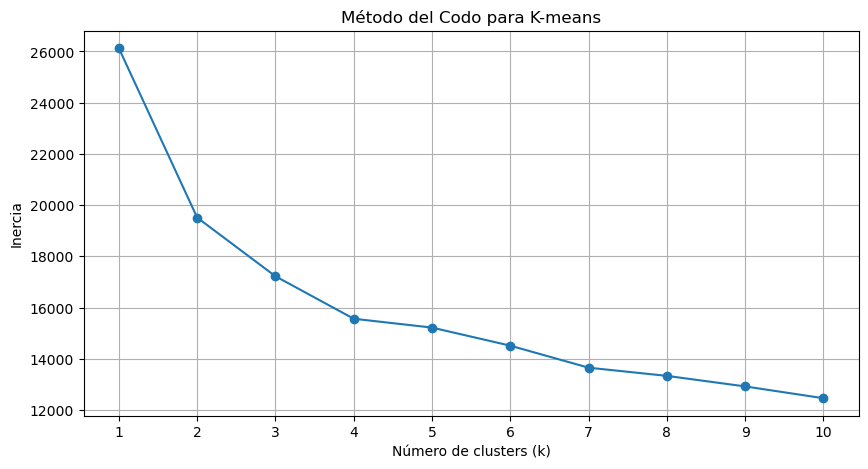

In [801]:
X = df_comb.values
inercia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, random_state= 32)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), inercia, marker= "o")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(np.arange(1, 11, 1))
plt.grid()

Aunque es un pcoo difici de establecer cual es el codo para esta base de datos, nos podemos dar una idea que el mejor valor de k para KMEANS va a ser de 4.

## Agrupación de los jugadores por clusters 

In [802]:
kmeans = KMeans(n_clusters= 4, init= "k-means++", random_state= 32)
clusters = kmeans.fit_predict(df_comb) # Hacemos el entrenamiento y la prediccion de clusters
df_comb["Cluster"] = clusters # Asignamos el valor del cluster del jugador a un nueva columna "Cluster"

# Es importante savber que significan los valores normalizados. Si el valor es cercano o menor a -1, signfica que ese valor es 
# menor a la media, si el valor es cercano a 0 significa que ese valor esta cercano a la media y si es cercano o mayor a 1
# eso signfica que ese valor será suerprior a la media.

cluster_stats = df_comb.groupby("Cluster").mean() #Hacemos una agrupación de clusters y a cada columna le asignamos la media de todos los jugadores pertenecientes a ese cluster
cluster_stats

c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Pos_2020,Age_2020,Tm_2020,G_2020,GS_2020,MP_2020,FG_2020,FGA_2020,FG%_2020,3P_2020,...,FT%_2022,ORB_2022,DRB_2022,TRB_2022,AST_2022,STL_2022,BLK_2022,TOV_2022,PF_2022,PTS_2022
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.313890,0.165258,-0.105757,0.138164,-0.057424,-0.212395,-0.139717,-0.415523,1.236777,-0.906301,...,-0.692155,1.188178,0.460631,0.739080,-0.664478,-0.507179,0.786636,-0.342031,0.266161,-0.392192
1,-0.342081,-0.133598,0.045942,0.356649,0.318125,0.431184,0.085881,0.205209,-0.209139,0.489194,...,0.302424,-0.297042,-0.120425,-0.191374,0.169592,0.309109,-0.147128,0.035552,0.203306,0.083076
2,-0.351167,-0.166944,-0.055923,0.395141,1.082443,1.218130,1.690184,1.650163,0.236379,0.955394,...,0.498751,0.174301,1.053905,0.846091,1.385884,0.821750,0.253373,1.658563,0.648095,1.700397
3,-0.145948,0.144286,0.033815,-0.669810,-0.869419,-0.980605,-0.874254,-0.838974,-0.549120,-0.540880,...,-0.217374,-0.394079,-0.645070,-0.610350,-0.532646,-0.486960,-0.385619,-0.694053,-0.695707,-0.741131


In [803]:
categ = cluster_stats.columns.tolist()
categ_clean = list()

for col in categ:
    categ_clean.append(col.split("_")[0])

cluster_new = cluster_stats.copy()

for stat in set(categ_clean):
    cluster_new[stat + " mean"] = cluster_stats[[stat+"_2020", stat+"_2021", stat+"_2022"]].mean(axis=1)

cluster_new = cluster_new.iloc[:, 84:]


## Visualización

### La visualización nos sirve para poder entender de una manera mas facil cual es la tendencia de los jugadores en cada cluster

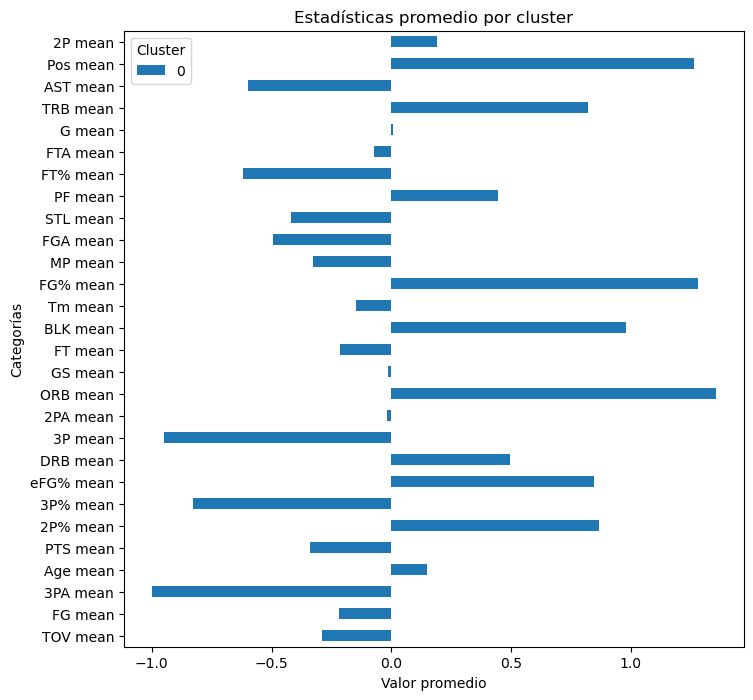

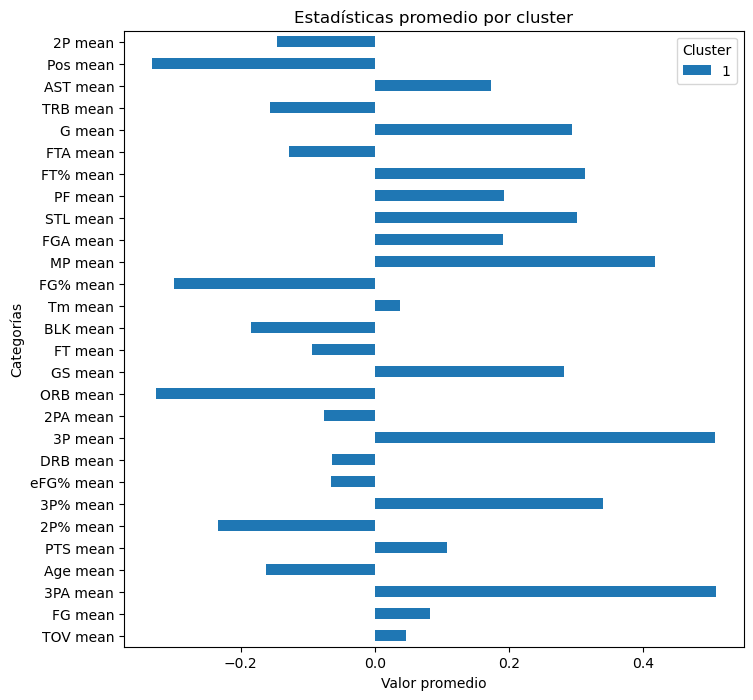

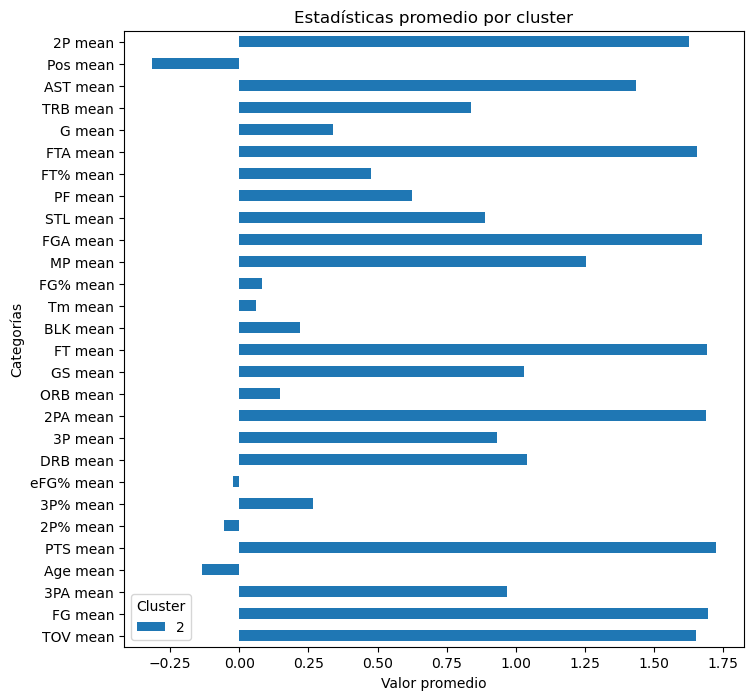

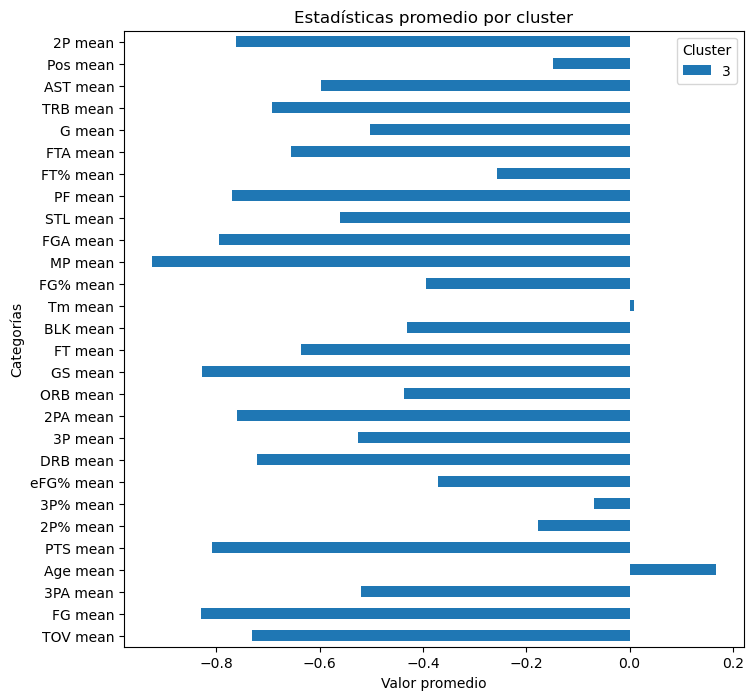

In [804]:
for x in range(4):
    cluster_new.loc[x].plot(kind="barh", figsize=(8, 8))
    plt.xlabel('Valor promedio')
    plt.ylabel('Categorías')
    plt.title('Estadísticas promedio por cluster')
    plt.legend(title='Cluster')
    plt.show()

In [805]:
jugadores_ambiguos = df_comb[df_comb["Cluster"] == 0]["Cluster"].index.tolist()
jugadores_similar = df_comb[df_comb["Cluster"] == 1]["Cluster"].index.tolist()
jugadores_mejorar = df_comb[df_comb["Cluster"] == 2]["Cluster"].index.tolist()
jugadores_empeorar = df_comb[df_comb["Cluster"] == 3]["Cluster"].index.tolist()
jugadores_similar = jugadores_similar + jugadores_ambiguos

print(f"Los jugadores que mejoraran son: {jugadores_mejorar}\n")
print(f"Los jugadores que empeoraran son: {jugadores_empeorar}\n")
print(f"Los jugadores de rol son: {jugadores_similar}\n")

Los jugadores que mejoraran son: ['Bam Adebayo', 'Giannis Antetokounmpo', 'LaMelo Ball', 'RJ Barrett', 'Bradley Beal', 'Devin Booker', 'Malcolm Brogdon', 'Jaylen Brown', 'Jimmy Butler', 'Stephen Curry', 'Anthony Davis', 'DeMar DeRozan', 'Kevin Durant', 'Anthony Edwards', 'Joel Embiid', "De'Aaron Fox", 'Darius Garland', 'Paul George', 'Shai Gilgeous-Alexander', 'Jerami Grant', 'James Harden', 'Tobias Harris', 'Gordon Hayward', 'Tyler Herro', 'Jrue Holiday', 'Brandon Ingram', 'Kyrie Irving', 'LeBron James', 'Keldon Johnson', 'Zach LaVine', 'Damian Lillard', 'Lauri Markkanen', 'CJ McCollum', 'Khris Middleton', 'Donovan Mitchell', 'Ja Morant', 'Dejounte Murray', 'Chris Paul', 'Julius Randle', 'Terry Rozier', "D'Angelo Russell", 'Domantas Sabonis', 'Collin Sexton', 'Pascal Siakam', 'Jayson Tatum', 'Karl-Anthony Towns', 'Fred VanVleet', 'Russell Westbrook', 'Christian Wood', 'Trae Young']

Los jugadores que empeoraran son: ['Nickeil Alexander-Walker', 'Thanasis Antetokounmpo', 'Ryan Arcidiac

- Los clusters 0 y 1 representan a los jugadores de rol, la diferencia es que en el cluster 0 están los jugadores que son postes y en el 3 los jugadores de rol que son guardias

- Los jugadores del cluster 2 son los jugadores que son estrellas y que sus promedios son arriba del promedio general de la liga

- Los jugadores del cluster 3 son jugadores que tienden a ser malos y que sus promedios son por debajo del promedio de la liga


In [806]:
from sklearn.manifold import TSNE

In [807]:
tsne = TSNE(n_components=2)
df_emb = tsne.fit_transform(df_comb)

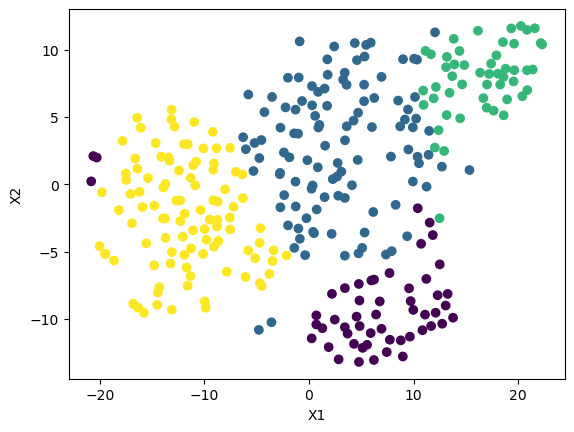

In [ ]:
plt.scatter(df_emb[:,0], df_emb[:,1], c= df_comb["Cluster"])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Resultados del modelo

Una vez terminada la temporada 2023-2024 se extrajeron las estadísticas de los jugadores, para revisar que tan certera fue nuestra predicción del rendimiento de estos.

In [ ]:
path = "../data/raw/2023_season/2023-2024 NBA Player Stats - Regular.csv"
df_result = pd.read_csv(path, sep=";", encoding="latin-1")

Para realizar la comparación de los resultados, voy a sacar el promedio de todas las categorias, para asi poder hacer una medición de en que rango de encuentran los jugadores en cuanto al promedio. 

La manera de determinar si un jugador está en la media, por arriba o abajo será la siguiente:
- Si se encuentra abajo de la media - desviación estadar, el jugador estará por debajo del promedio
- Si se encuentra arriba de la media + desviación estandar el jugadore estará por encima del promedio
- Si se encuentra arriba de rango inferior pero por debajo del superior, el jugadore estará en el promedio

In [ ]:
df_score

,Pos_2023,Age_2023,Tm_2023,G_2023,GS_2023,MP_2023,FG_2023,FGA_2023,FG%_2023,3P_2023,...,ORB_2023,DRB_2023,TRB_2023,AST_2023,STL_2023,BLK_2023,TOV_2023,PF_2023,PTS_2023,Valor_repetido
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,0,0,0,0,-1,0,0,0,0,-1,...,1,1,1,-1,0,1,0,0,0,0
Bam Adebayo,0,0,0,0,1,1,1,1,1,-1,...,1,1,1,1,1,1,1,1,1,1
Nickeil Alexander-Walker,0,0,0,0,-1,0,0,0,0,0,...,-1,-1,-1,0,0,0,0,0,0,0
Grayson Allen,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Jarrett Allen,0,0,0,0,1,1,1,0,1,-1,...,1,1,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,0,0,0,0,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,1,-1,-1,-1,-1,-1
Thaddeus Young,0,0,0,0,-1,-1,-1,-1,1,-1,...,1,-1,0,0,0,-1,-1,0,-1,-1
Trae Young,0,0,0,0,1,1,1,1,0,1,...,-1,0,-1,1,1,-1,1,0,1,1


In [ ]:
equipos_este_2023 = ["BOS", "NYK", "MIL", "CLE", "ORL", "IND", "PHI", "MIA"]
equipos_oeste_2023 = ["OKC", "DEN", "MIN", "LAC", "DAL", "PHX", "GSW", "LAL"]
playoffs_2023 = equipos_este_2023 + equipos_oeste_2023

In [ ]:
def ausente_2 (df1, df2, df3, df4):
    jugadores_df2 = set(df2["Player"])
    jugadores_df3 = set(df3["Player"])
    jugadores_df4 = set(df4["Player"]) #Hacemos una lista de todos los jugadores en la columna "Player"
    df1_filtrado = df1[(df1["Player"].isin(jugadores_df2)) & (df1["Player"].isin(jugadores_df3) & (df1["Player"].isin(jugadores_df4)))] #Hacemos un filtrado de los jugadores que aparecen en los tres dataframes
    return df1_filtrado

In [ ]:
df_result_new = numericas(df_result, playoffs_2023)
df_result_new = ausente_2(eliminador(df_result), df_2020, df_2021, df_2022)
df_result_new = nombre_col(continuo(df_result_new), "2023")
df_result_new = (df_result_new - df_result_new.mean())/ df_result_new.std()

In [ ]:
def score(valor, q25, q75):
    if valor > q75:
        return 1
    elif valor < q25:
        return -1
    else:
        return 0

In [ ]:
q25 = df_result_new.quantile(0.25)
q75 = df_result_new.quantile(0.75)

df_score = df_result_new.apply(lambda x: x.apply(lambda y: score(y, q25[x.name], q75[x.name])))

In [ ]:
valor_comun = df_score.apply(lambda x: x.value_counts().idxmax(), axis=1)
df_score['Valor_repetido'] = valor_comun

In [ ]:
jugadores_promedio = df_score[df_score["Valor_repetido"] == 0]["Valor_repetido"].index.tolist()
jugadores_arriba = df_score[df_score["Valor_repetido"] == 1]["Valor_repetido"].index.tolist()
jugadores_abajo = df_score[df_score["Valor_repetido"] == -1]["Valor_repetido"].index.tolist()

print(f"Los jugdores arriba del promedio fueron {len(jugadores_arriba)}")
print(f"Los jugadores en el promedio fueron {len(jugadores_promedio)}")
print(f"los jugdores abajo del promedio fueron {len(jugadores_abajo)}")

Los jugdores arriba del promedio fueron 43
Los jugadores en el promedio fueron 183
los jugdores abajo del promedio fueron 47


In [ ]:
def similitud(lista, lista2):
    lista_j = []
    coincidencia = 0
    for x in lista:
        if x in lista2:
            lista_j.append(x)
    
    return lista_j

In [ ]:
lista_mejor = similitud(jugadores_arriba, jugadores_mejorar)
lista_promedio = similitud(jugadores_promedio, jugadores_similar)
lista_abajo = similitud(jugadores_abajo, jugadores_empeorar)
lista_final = lista_mejor + lista_promedio + lista_abajo

In [ ]:
score_final = len(lista_final)/len(df_score)
score_final

0.6776556776556777